In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Visualization
from matplotlib.pyplot import xticks
%matplotlib inline

#Customize Data Display
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


# Data Preparation

### Data Loading

In [5]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Check incase any duplicates (dulicates not found)
sum(data.duplicated(subset='Prospect ID'))==0


True

### Data Inspection

In [7]:
data.shape

(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [10]:
# As we can observe that there are select values for many column, example column : How did you hear about XEducation.
#This is because user did not select any option from the drop down list, hence it shows is replaced with word 'select'.
# 'Select' values in such a scenario are as good as NULL.

# Converting 'Select' values to NaN.
data= data.replace('Select', np.nan)

In [11]:
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Addressing the null value columns

In [12]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Converting to percentage
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Dropping the columns having over 70% null values
data= data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns,1)

In [15]:
perc=round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending = False)
perc

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted 

### Addressing left over columns with null values

In [16]:
# Lead Quality: Quality of lead based on the data and intuition, employee assigned to the lead. This column has the most null values now.
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

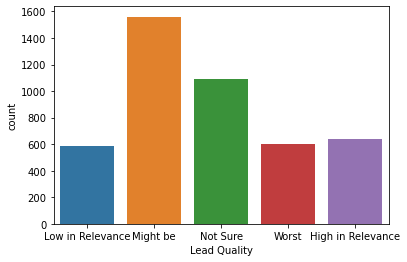

In [17]:
# Visualizing this column's data
sns.countplot(data['Lead Quality'])

In [18]:
#Lead quality is based on intution of employee, we can safely impute 'Not Sure' to NaN.

data['Lead Quality']=data['Lead Quality'].replace(np.nan,'Not Sure')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

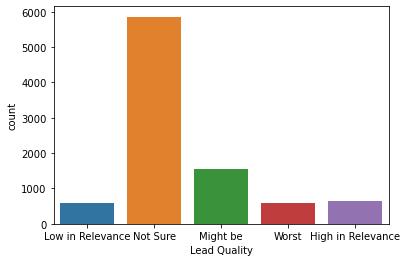

In [19]:
# Visualizing this column's data again
sns.countplot(data['Lead Quality'])

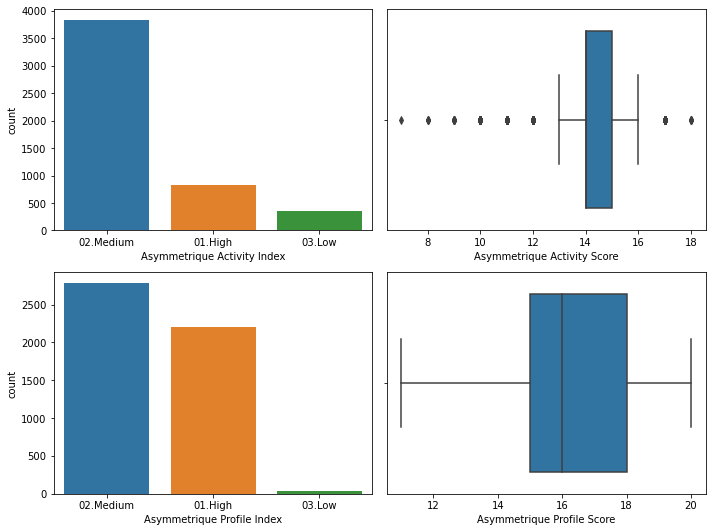

In [20]:
# Analyzing further 
#An index and score assigned to each customer based on their activity and their profile
#Asymmetrique Activity Index                      45.65
#Asymmetrique Profile Index                       45.65
#Asymmetrique Activity Score                      45.65
#Asymmetrique Profile Score                       45.65

fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [21]:
# many variation in the data, difficult to impute, rather drop as it has over 45% null

#'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'

In [22]:
#checking the data again
data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [23]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [24]:
#Next, working on City Column

data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

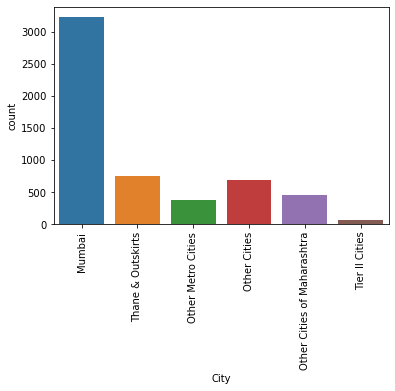

In [25]:
sns.countplot(data.City)
xticks(rotation=90)

In [26]:
# Approx 60% of the data is Mumbai,  we can impute 'Mumbai' in the missing values.

data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [27]:
#Next, working on Specialization Column

data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

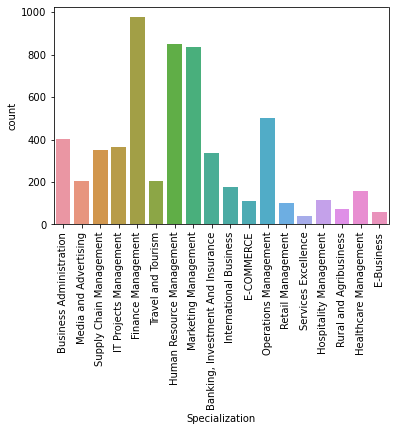

In [28]:
sns.countplot(data.Specialization)
xticks(rotation = 90)

In [29]:
# Creating a category 'Others'for those who did not get option of their choice
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [30]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [31]:
# Next, Tags

data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

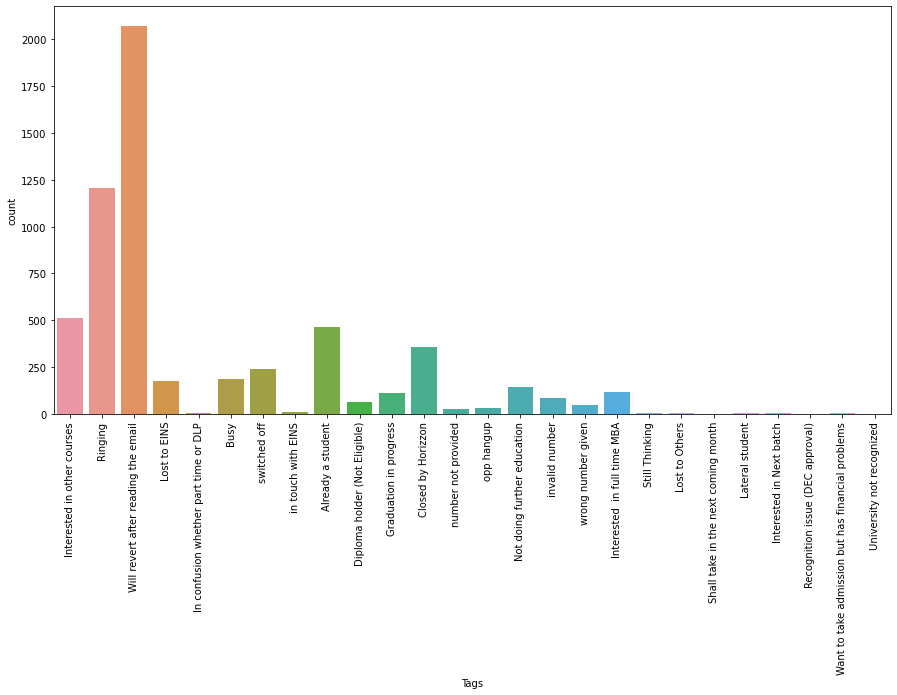

In [32]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)

In [33]:
# 'Will revert after reading the email' can be imputeted with null
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

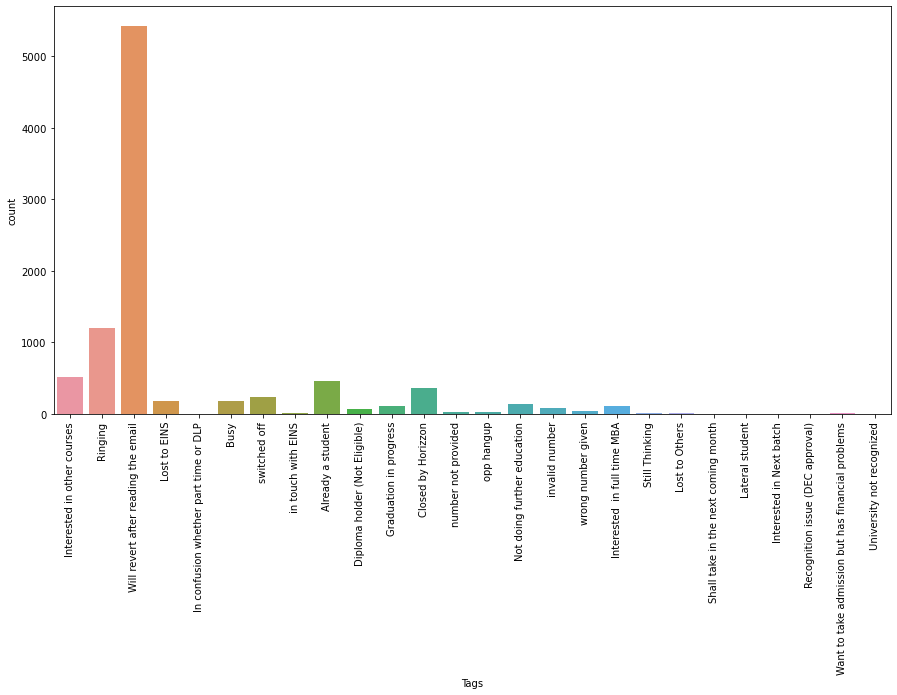

In [34]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)

In [35]:
#Next, What matters most to you in choosing a course column
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [36]:
# Blanks in the this column could be imputed by 'Better Career Prospects'.
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [37]:
#Next,What is your current occupation column

In [38]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [39]:
# 86% entries are of Unemployed , we can impute "Unemployed" in it.
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [40]:
# Next, Country column
data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [41]:
# Country is India for most values so let's impute the same in missing values.
data['Country'] = data['Country'].replace(np.nan, 'India')

In [42]:
#Checking the nulls again

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [43]:
# Rest columns with missing values are under 2%, we can drop these rows.
data.dropna(inplace = True)

In [44]:
#checking for null again

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [45]:
data.to_csv('Leads_cleaned')

#### Now Data is clean and we can start with the analysis part
# Exploratory Data Analytics
### Univariate Analysis
## Converted

In [46]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,620536.753302,0.374111,3.564926,491.016054,2.408069,14.314977,16.337330
std,29379.922968,0.483942,4.201033,547.477817,2.212106,1.396554,1.804918
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,588721.000000,0.000000,1.000000,19.000000,1.000000,14.000000,15.000000
50%,635337.000000,0.000000,3.000000,255.000000,2.000000,14.000000,16.000000
75%,646363.000000,1.000000,5.000000,936.000000,3.330000,15.000000,18.000000
max,660737.000000,1.000000,141.000000,2253.000000,55.000000,18.000000,20.000000


In [47]:
# Converted is the target variable that indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.41109530583215

### Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

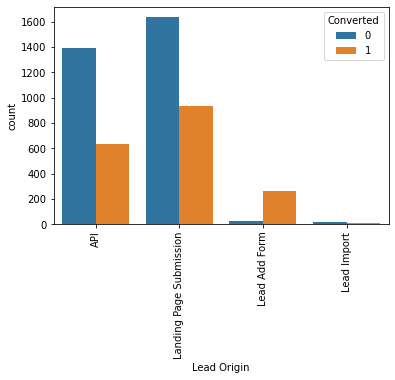

In [48]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)

### Inference:

#### 1.API and Landing Page Submission :  have 45-50% conversion rate but count of lead originated from these are considerable.
#### 2.Lead Add Form : has more than 90% conversion rate but count of lead are not very high.

### To improve overall lead conversion rate, let's focus more on improving lead converion of API and Landing Page Submission origin, and generate more leads from Lead Add Form.


## Lead Source


In [49]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

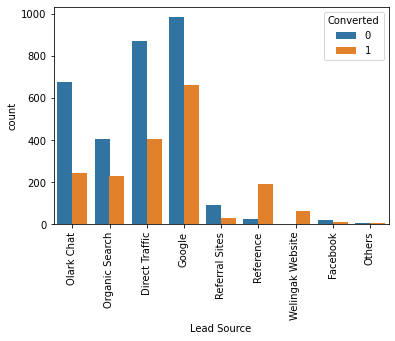

In [50]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

## Inference:

#### 1.Google and Direct traffic generates maximum number of leads.
#### 2.Conversion Rate of reference leads and leads through welingak website is high.

### To improve overall lead conversion rate, focus should be on improving lead converion on olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### Do Not Email & Do Not Call

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

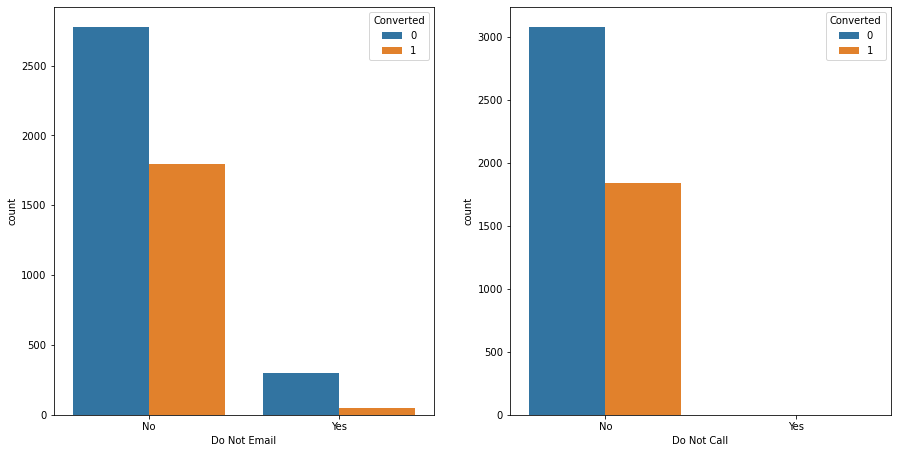

In [51]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

### Total Visits

In [52]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4921.000000
mean        3.564926
std         4.201033
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       141.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

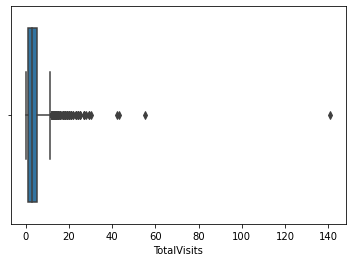

In [53]:
sns.boxplot(data['TotalVisits'])

In [54]:
# There are a number of outliers in the data.
# We can cap the outliers to 95% value for analysis.

percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

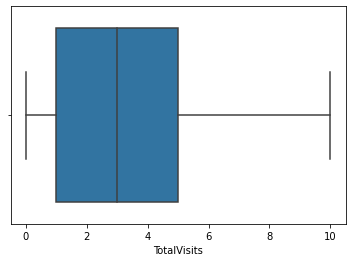

In [55]:
sns.boxplot(data['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

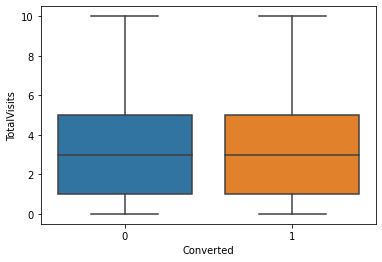

In [56]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

### Inference:

#### 1.Median for converted and not converted leads are the same.

### Nothng conclusive can be said on the basis of Total Visits.

### Total time spent on website

In [57]:
data['Total Time Spent on Website'].describe()

count    4921.000000
mean      491.016054
std       547.477817
min         0.000000
25%        19.000000
50%       255.000000
75%       936.000000
max      2253.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

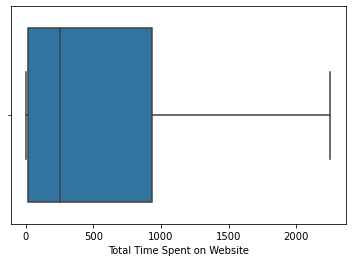

In [58]:
sns.boxplot(data['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

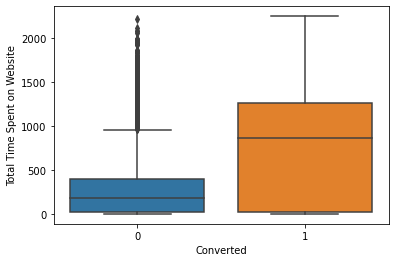

In [59]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

## Inference:

#### 1.Leads spending more time on the weblise are more likely to be converted.
#### So, Website should be made more engaging to make leads spend more time.

## Page views per visit

In [60]:
data['Page Views Per Visit'].describe()

count    4921.000000
mean        2.408069
std         2.212106
min         0.000000
25%         1.000000
50%         2.000000
75%         3.330000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

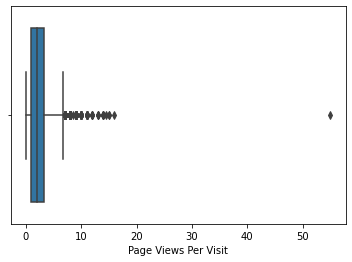

In [61]:
sns.boxplot(data['Page Views Per Visit'])

In [62]:
# Lets cap the outliers at 95%, as there are number of outliers

percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

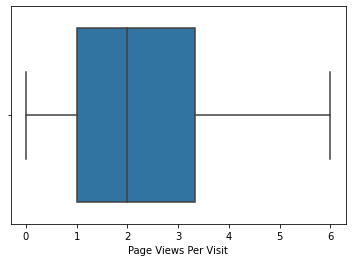

In [63]:
sns.boxplot(data['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

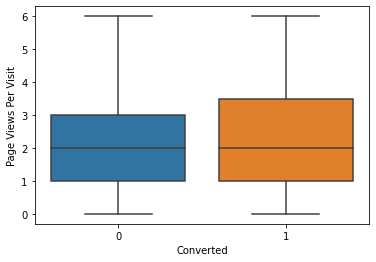

In [64]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

## Inference:

#### 1.Median for converted and unconverted leads is the same.
#### So, cannot say specifically for lead conversion from Page Views Per Visit

## Last Activity

In [65]:
data['Last Activity'].describe()

count             4921
unique              16
top       Email Opened
freq              1987
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

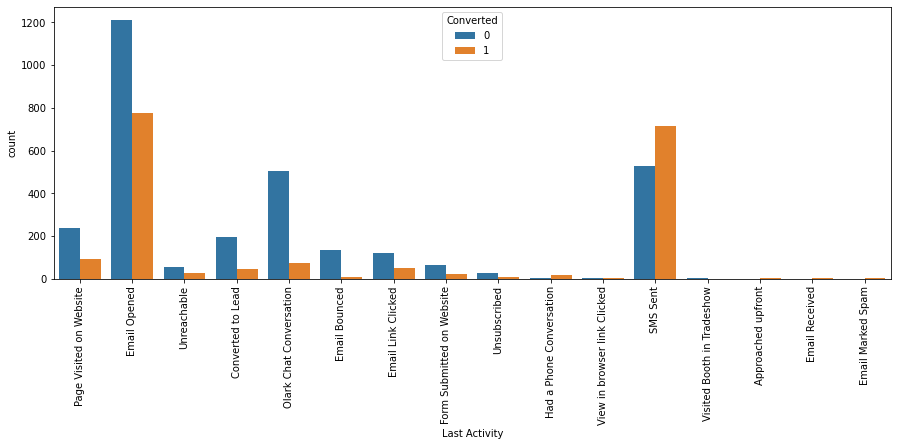

In [66]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [67]:
# Keeping considerable last activities as it is, and clubbing all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

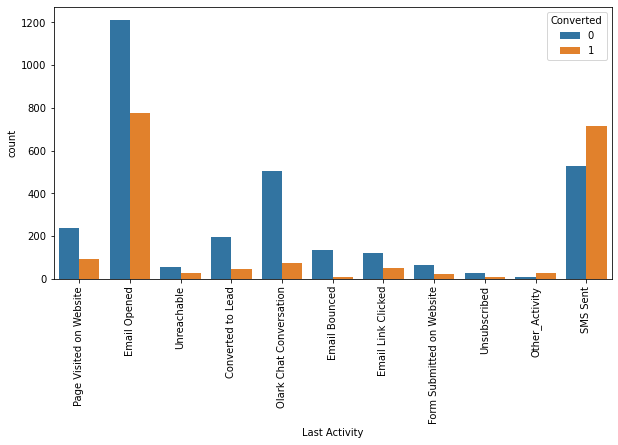

In [68]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## Inference:
#### Most of the lead have their Email opened as their last activity.
#### Conversion rate for leads with last activity as SMS Sent is almost 60%.

### Country

In [69]:
data.Country.describe()

count      4921
unique       33
top       India
freq       4755
Name: Country, dtype: object

## Inference:
#### AlMost all values are 'India',  no particular other inference can be drawn

### Specialization

In [70]:
data.Specialization.describe()

count       4921
unique        19
top       Others
freq        1814
Name: Specialization, dtype: object

In [71]:
# Replacing Others with Other_Specialization
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other_Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

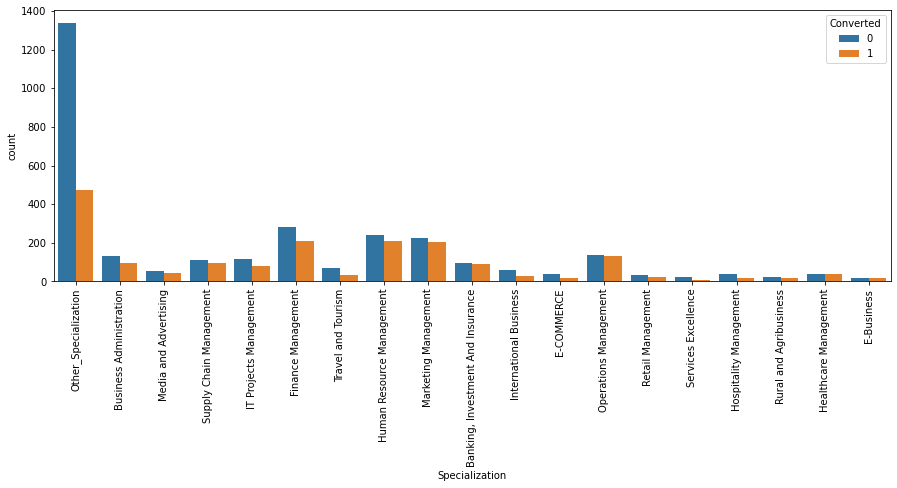

In [72]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

## Inference:
#### Focus should be more on the Specialization with high conversion rate like Marketing Management, Baking, Investment and Insurance, Operations Management.
#### Other Specialization has many leads but conversion is only 30%

## Occupation

In [73]:
data['What is your current occupation'].describe()

count           4921
unique             6
top       Unemployed
freq            4441
Name: What is your current occupation, dtype: object

In [74]:
# Replacing Other with Other_Occupation
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other_Occupation'),
  Text(5, 0, 'Housewife')])

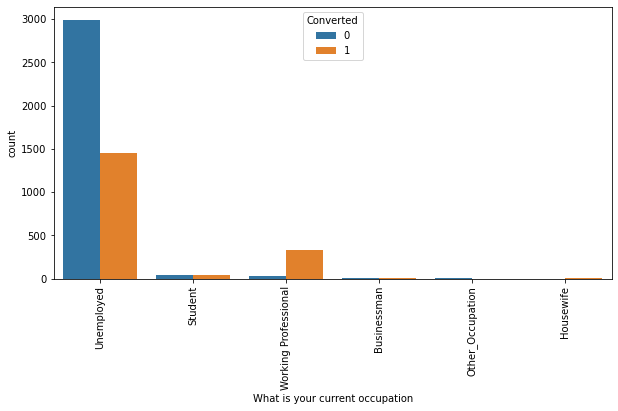

In [75]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

## Inference:
#### 1.Working Professionals going for the course have high chances of joining it, converts the most.
#### 2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

## What matters most to you in choosing a course

In [76]:
data['What matters most to you in choosing a course'].describe()

count                        4921
unique                          2
top       Better Career Prospects
freq                         4920
Name: What matters most to you in choosing a course, dtype: object

## Inference:
#### 1.Most entries are 'Better Career Prospects'. No Inference can be drawn here.

## Search

In [77]:
data.Search.describe()

count     4921
unique       2
top         No
freq      4914
Name: Search, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Magazine

In [78]:
data.Magazine.describe()

count     4921
unique       1
top         No
freq      4921
Name: Magazine, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Newspaper Article

In [79]:
data['Newspaper Article'].describe()

count     4921
unique       2
top         No
freq      4920
Name: Newspaper Article, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## X Education Forums

In [80]:
data['X Education Forums'].describe()

count     4921
unique       1
top         No
freq      4921
Name: X Education Forums, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Newspaper

In [81]:
data['Newspaper'].describe()

count     4921
unique       1
top         No
freq      4921
Name: Newspaper, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Digital Advertisement

In [82]:
data['Digital Advertisement'].describe()

count     4921
unique       2
top         No
freq      4919
Name: Digital Advertisement, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Through Recommendation

In [83]:
data['Through Recommendations'].describe()

count     4921
unique       2
top         No
freq      4918
Name: Through Recommendations, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Receive More Updates About Our Courses

In [84]:
data['Receive More Updates About Our Courses'].describe()

count     4921
unique       1
top         No
freq      4921
Name: Receive More Updates About Our Courses, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Tags

In [85]:
data.Tags.describe()

count                                    4921
unique                                     25
top       Will revert after reading the email
freq                                     2832
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Want to take admission but has financial problems'),
  Text(21, 0, 'University not recognized'),
  Text(22, 0, 'Sha

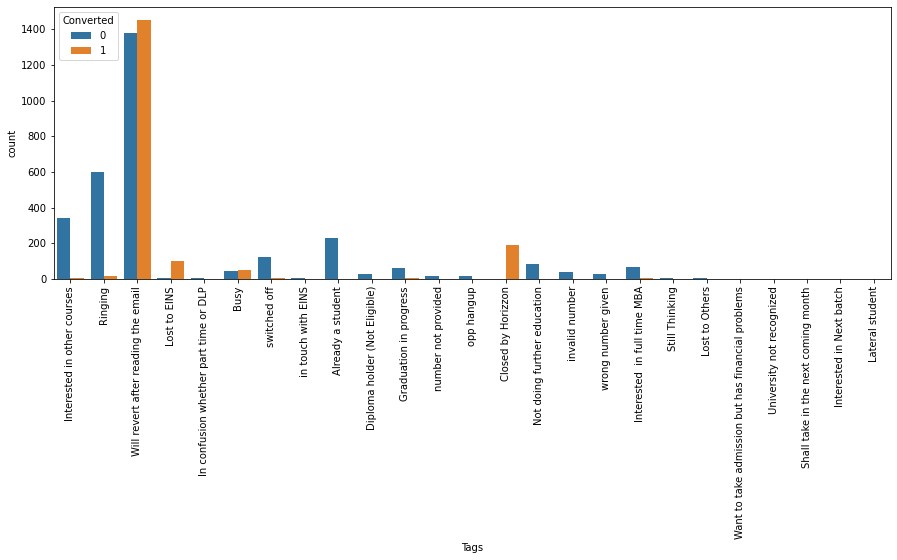

In [86]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [87]:
# Keeping considerable last activities as such and clubbing all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Other_Tags'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'Not doing further education'),
  Text(10, 0, 'invalid number'),
  Text(11, 0, 'wrong number given'),
  Text(12, 0, 'Interested  in full time MBA')])

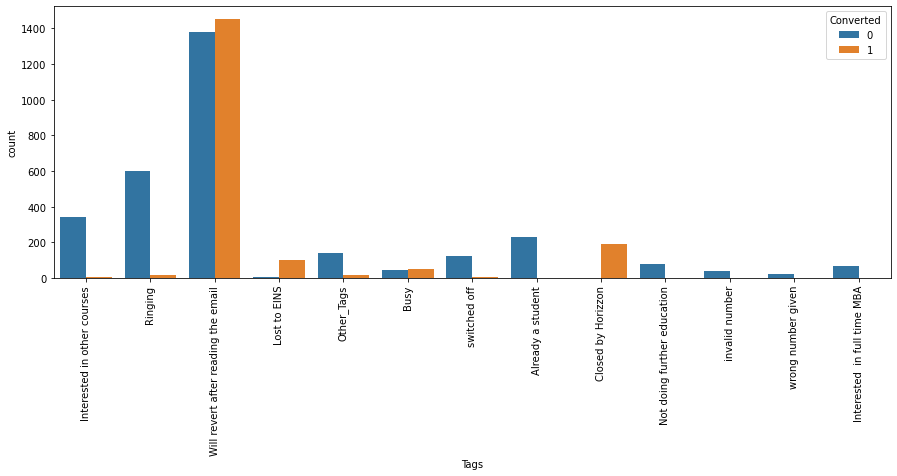

In [88]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

## Inference:
#### Mostly all conversion for Will revert after reading the email. Continue email exercise

## Lead Quality


In [89]:
data['Lead Quality'].describe()

count         4921
unique           5
top       Not Sure
freq          3143
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

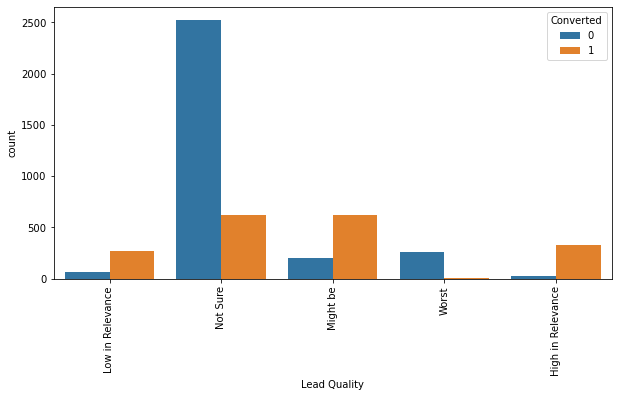

In [90]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

## Inference
#### High number of Not Sure, more clarity needs to be provided.
#### All might be leads converted successfully

## Update me on Supply Chain Content

In [91]:
data['Update me on Supply Chain Content'].describe()

count     4921
unique       1
top         No
freq      4921
Name: Update me on Supply Chain Content, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Get updates on DM Content

In [92]:
data['Get updates on DM Content'].describe()

count     4921
unique       1
top         No
freq      4921
Name: Get updates on DM Content, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## I agree to pay the amount through cheque

In [93]:
data['I agree to pay the amount through cheque'].describe()

count     4921
unique       1
top         No
freq      4921
Name: I agree to pay the amount through cheque, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## A free copy of Mastering The Interview

In [94]:
data['A free copy of Mastering The Interview'].describe()

count     4921
unique       2
top         No
freq      3385
Name: A free copy of Mastering The Interview, dtype: object

## Inference:
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## City

In [95]:
data.City.describe()

count       4921
unique         6
top       Mumbai
freq        3674
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

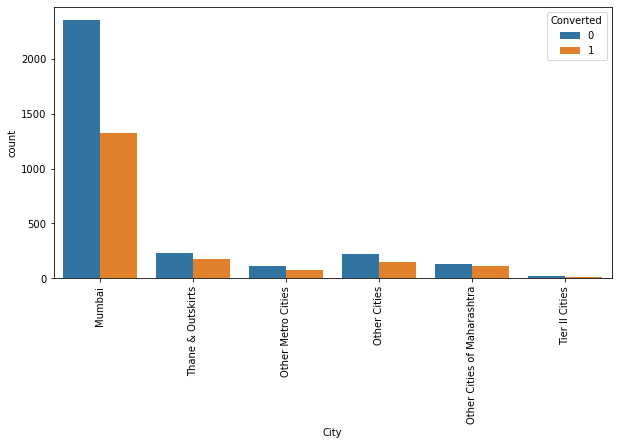

In [96]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

## Inference:
#### Most leads are from mumbai with around 30% conversion rate.

## Last Notable Activity

In [97]:
data['Last Notable Activity'].describe()

count         4921
unique          13
top       Modified
freq          2101
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Email Received'),
  Text(12, 0, 'Email Marked Spam')])

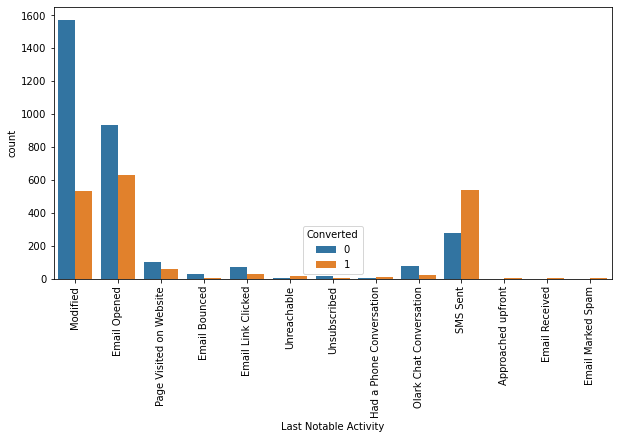

In [98]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## Results
#### Based on the univariate analysis we  see many columns are not adding any information to the model, hence we can drop them for further analysis

In [99]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [100]:
data.shape

(4921, 20)

In [101]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,02.Medium,02.Medium,15.0,15.0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,02.Medium,15.0,15.0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,Modified


## Data Preparation
#### Converting some binary variables (Yes/No) to 1/0

In [104]:
data.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,0.070514,0.000406,0.374111,3.305019,491.016054,2.297175,14.314977,16.337330
std,0.256038,0.020158,0.483942,2.834069,547.477817,1.785482,1.396554,1.804918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,14.000000,15.000000
50%,0.000000,0.000000,0.000000,3.000000,255.000000,2.000000,14.000000,16.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.330000,15.000000,18.000000
max,1.000000,1.000000,1.000000,10.000000,2253.000000,6.000000,18.000000,20.000000


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4921 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      4921 non-null   object 
 1   Lead Origin                      4921 non-null   object 
 2   Lead Source                      4921 non-null   object 
 3   Do Not Email                     4921 non-null   int64  
 4   Do Not Call                      4921 non-null   int64  
 5   Converted                        4921 non-null   int64  
 6   TotalVisits                      4921 non-null   float64
 7   Total Time Spent on Website      4921 non-null   int64  
 8   Page Views Per Visit             4921 non-null   float64
 9   Last Activity                    4921 non-null   object 
 10  Specialization                   4921 non-null   object 
 11  What is your current occupation  4921 non-null   object 
 12  Tags                

In [102]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying above function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [103]:
### For categorical variables with multiple levels, create dummy features 

In [ ]:
#ting a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

In [ ]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

In [ ]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [ ]:
data.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1)

In [ ]:
X.head()

In [ ]:
# Putting response variable to y
y = data['Converted']

In [ ]:
y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

In [ ]:
# Checking the Churn Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

#### Almost 38% conversion
## Model Building
#### Running  First Training Model

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
X_train_sm = (sm.add_constant(X_train))
logm1 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm1.fit().summary()

## Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
col1 = col.drop(['Tags_wrong number given'],1)
col1

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
col2 = col1.drop('Tags_Interested in other courses',1)
col2

In [ ]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
col3 = col2.drop('Lead Origin_Lead Add Form',1)
col3

In [ ]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
col4 = col3.drop('Tags_switched off',1)
col4

In [ ]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

### Checking VIFs now

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Checking the sensitivity of the logistic regression model

TP / float(TP+FN)

In [ ]:
# Checking the specificity
TN / float(TN+FP)

In [ ]:
# Calculating false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Checking positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Checking negative predictive value
print (TN / float(TN+ FN))

## Plotting the ROC Curve

### An ROC curve demonstrates several things:
#### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point
#### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

### Assigning Lead Score

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

In [ ]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Calculating specificity
TN / float(TN+FP)

In [ ]:
# Calculating false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Checking Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Checking Negative predictive value
print (TN / float(TN+ FN))

### Making predictions on the test set

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

In [ ]:
X_test = X_test[col4]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Calculating specificity
TN / float(TN+FP)